# **Module 2: Data Visualization**
Well made graphics can greatly increase our ability to understand and interpret data. 
In this module we will use the matplotlib to generate a variety of basic graphs.

In [1]:
# Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the data we generated in the last exercise 
df = pd.read_csv("weatherCondensed.csv")
df.head()

,Formatted Date,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Temperature (F),Apparent Temperature (F),Wind Type
0,2006-01-01 12:00:00+01:00,Mostly Cloudy,rain,0.77,21.4452,149.0,11.2056,1012.00,Mostly cloudy throughout the day.,40.84,33.45,still
1,2006-01-02 12:00:00+01:00,Overcast,rain,0.80,13.1859,156.0,11.2700,1008.37,Overcast throughout the day.,44.59,40.09,still
2,2006-01-03 12:00:00+01:00,Mostly Cloudy,rain,0.89,9.0643,257.0,11.1251,1020.80,Mostly cloudy throughout the day.,37.13,32.60,still
3,2006-01-04 12:00:00+01:00,Overcast,rain,0.89,15.8263,20.0,11.1251,1025.36,Overcast throughout the day.,37.00,30.00,still
4,2006-01-05 12:00:00+01:00,Overcast,rain,0.92,8.0822,22.0,4.6690,1020.77,Foggy in the morning.,38.92,35.19,still


## Matplotlib Basics
The matplotlip.pyplot library is a collection functions made to mimic MATLAB's graphing capabilities. 

The basic structure for creating a graphic using Matplolib is as follows: 
* **Initiate your graphic**: Specify the type of graph by using a function such as plt.scatter() or plt.hist() and input your data

* **Add Additional Elements**: Use further commands such as plt.xlabel() to add labels or additional formatting

* **Show your Graphic**: Use the plt.show() function to display your graphic


### plt.plot()

plt.plot() is the most basic plotting function and can create a graph using only one input argument. If you call plt.plot() with only one argument, as we have below, it will treat the first argument as y values and automatically generate an appropriately sized index to use as the x values. If you pass it two lists/arrays as arguments, it will use the first as x values and the second as y values. If the two lists/arrays do not match in size, it will throw an error. 

Later, we will use plt.plot() with additional agreements to further format our graph. 

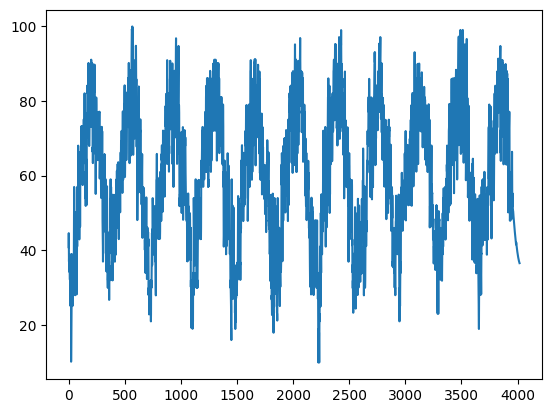

In [3]:
#### Initiate Graphic #####
# x and y must be of the same size. If only one argument is given it will be plotted as the y variable
# plt.plot() is the most basic graph command and by default forms a line graph 
plt.plot( df["Temperature (F)"])    # plot temperature 
#### Show Graphic ####
plt.show()

### Adding Chart and Axis Labels
To improve our graph, we have it display only one year of data and add axis and chart titles. 

plt.title("string") adds a title to the graph

plt.xlabel("string") adds an x axis label

plt.ylabel("string") adds a y axis label

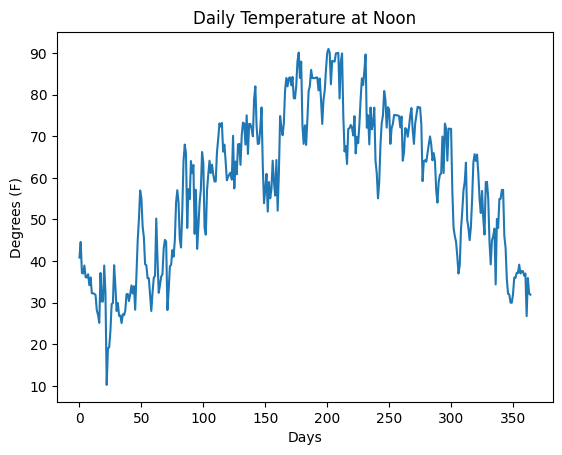

In [4]:
#### Initiate Graphic #####
plt.plot(df["Temperature (F)"][0:365]) 
#### Add Additional Elements ####
plt.xlabel("Days")
plt.ylabel("Degrees (F)")
plt.title("Daily Temperature at Noon")
#### Show Graphic ####
plt.show()

### Specifying Axis Limits and Tick Marks
We generally don't reference the date by what numerical day of the year it is, so it would be more useful if our x-axis was in months. We can do this by using plt.xticks() to specify where we want our tick marks and what we want them to be called. The first list passed into plt.xticks() dictates where the tick marks will be, and the second list labels each tick mark. If we only pass in one list, this list will be used for the tick mark positions and labels (see how we use plt.yticks()).

plt.plot() automatically choses the axis range based on the extent of the input data. Since the lowest temperature reading is near 10 F, this is the lowest the axis goes. However, we are used to temperature axis that start at 0 F, so we will extend the y axis limits using plt.ylim().<br>
We also think our y axis would be easier read if it had more frequent tick marks. Below we use plt.yticks() and the range() function to add ticks from 0 to 100 spaced every 5 degrees. To add even more clarity to our graph, we use plt.grid() to draw grid lines. The grid lines are drawn base on the tick marks and have the same spacing. 

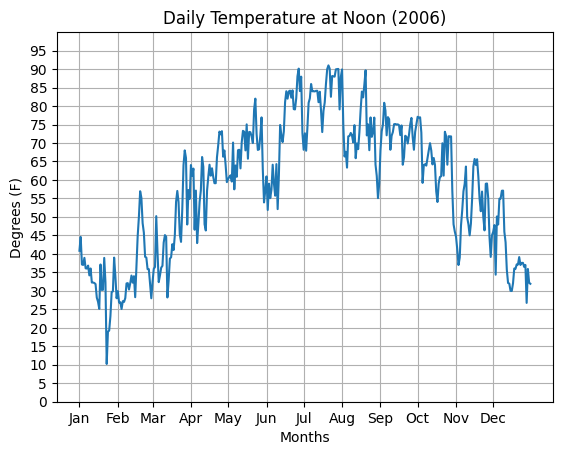

In [5]:
#### Initiate Graphic #####
plt.plot(df["Temperature (F)"][0:365]) 
#### Add Additional Elements ####
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.title("Daily Temperature at Noon (2006)")
plt.ylim([0,100])
plt.yticks(range(0,100,5))  # yticks() can take in any list.
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334],
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"])
plt.grid()  # adds background gird 
#### Show Graphic ####
plt.show()

### Graphing more than one variable at once
There are a few ways to plot multiple lines at once, but the most simple is to initiate the second line of data by repeating the plt.plot() function. Since plots aren't drawn until plt.show() is called, both plots will be drawn in the same graphic. If you call plot.show() after each plot, then then each plots will be drawn as its own graphic. 

We will need to be able to tell our lines apart, so we add two additional arguments to the plt.plot() functions.   
* "b-" indicated that the data should be drawn as a blue line, and "r-" indicated a red line.   
* **label** assigned a name to each data series 

We also added the plt.legend() to display our data labels.

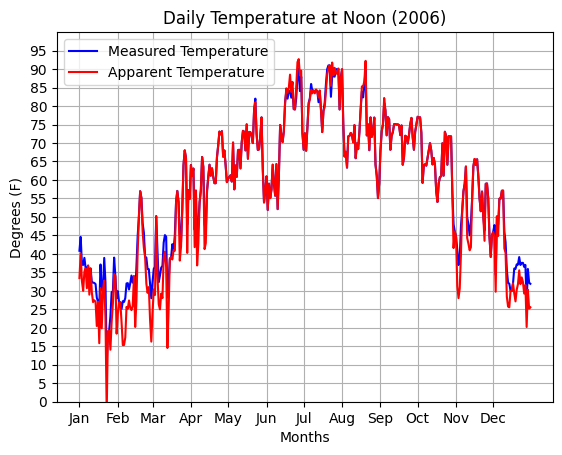

In [6]:

#### Initiate Graphic #####
plt.plot( df["Temperature (F)"][0:365], "b-", label = "Measured Temperature" ) 
plt.plot(df["Apparent Temperature (F)"][0:365], "r-", label = "Apparent Temperature")
#### Add Additional Elements ####
plt.xlabel("Days")
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.title("Daily Temperature at Noon (2006)")
plt.ylim([0,100])
plt.yticks(range(0,100,5)) 
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334],
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"])
plt.grid()  
plt.legend() # adds legend
#### Show Graphic ####
plt.show()

## Scatter Plots
Scatter plots can be formed by adapting the plt.plot() function or by using plt.scatter().

First we will create a scatter plot by adding the argument "ro" to the plt.plot() command. This specifies red circles.   
We could also use "y^" for yellow triangles or "gs" for green squares. 

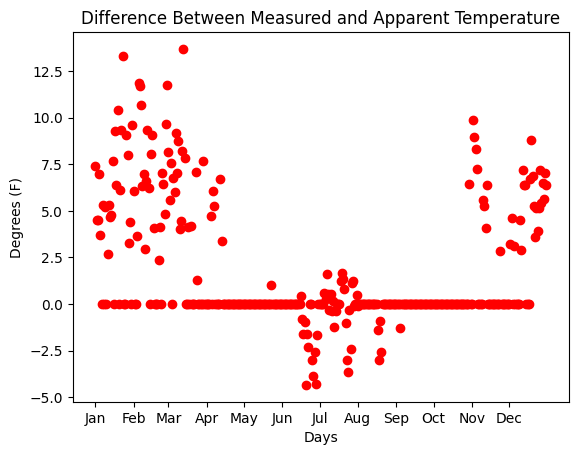

In [7]:
# We want to form a scatter plot of the daily difference between measured and apparent temperature. 
# Again we will just look at the first year of data 
temp_diff = df["Temperature (F)"][0:365] - df["Apparent Temperature (F)"][0:365]

#### Initiate Graphic #####
plt.plot(temp_diff, "ro")     
#### Add Additional Elements ####
plt.xlabel("Days")
plt.ylabel("Degrees (F)")
plt.title("Difference Between Measured and Apparent Temperature")
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334],
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"])
#### Show Graphic ####
plt.show()

### plt.scatter()
plt.scatter() is matplotlib's specific function for scatter plots and lets you form a scatter plot without having the specify the marker (it defaults to using blue circles). <br> 
Unlike plt.plot() it requires two lists/arrays to form a graph so we will use the range() function to create our indices. Remember that we could have specified our x values in this same way in plt.plot(), but we chose to let it autogenerate our indices. 


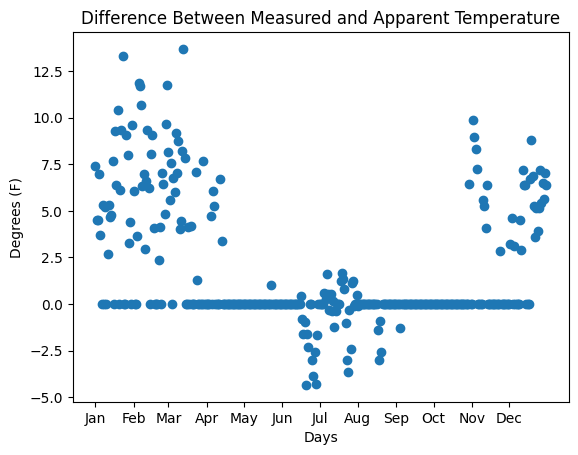

In [8]:
#### Initiate Graphic #####
plt.scatter(range(365),temp_diff)     # scatter requires that we specify both the x and y data. range(x) creates a list starting at zero and counting up to x-1.
#### Add Additional Elements ####
plt.xlabel("Days")
plt.ylabel("Degrees (F)")
plt.title("Difference Between Measured and Apparent Temperature")
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334],
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"])
#### Show Graphic ####
plt.show()

Next, we want to see if there is a relationship between the difference in measured and apparent temperature and the wind speed, so we plot one as a function of the other. 

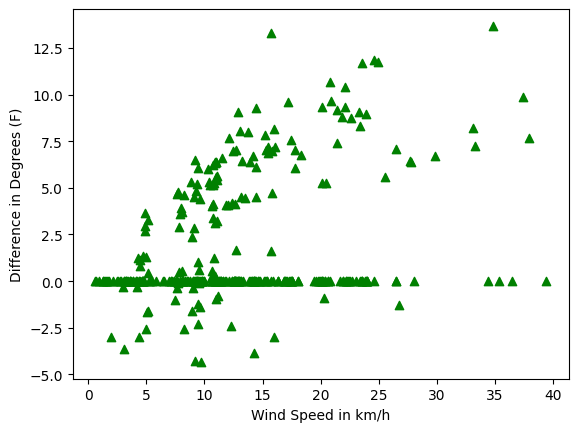

In [9]:
#### Initiate Graphic #####
plt.scatter(df["Wind Speed (km/h)"][0:365],temp_diff, color = "green", marker = "^")     # here I also change the marker shape and color  
#### Add Additional Elements ####
plt.xlabel("Wind Speed in km/h")
plt.ylabel("Difference in Degrees (F)")
#### Show Graphic ####
plt.show()



Many days there is no difference between the measured and apparent temperature, but when there is a difference it seems to have a slight positive correlation with wind speed. 

## Histograms
Histograms can be made using the plt.hist() function. It requires the user to input the data (in a list or array) followed by the number of bins. If only one argument is given, matplotlib uses a default bin number. 

Note that even though we have changed chart types, functions in our "Additional Elements" section still work as before. 



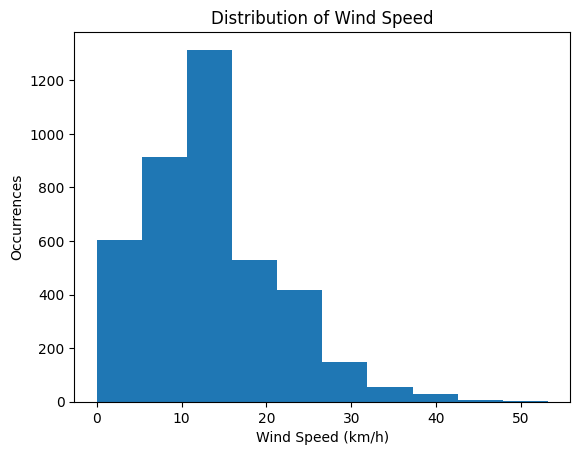

In [10]:
#### Initiate Graphic #####
plt.hist(df["Wind Speed (km/h)"])   #No bins specified, default used
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.title("Distribution of Wind Speed")
#### Show Graphic ####
plt.show()

Previously we created a column named "Wind Type" based on whether the summary contained the words "breezy" or "windy."

Now we want to make histograms of the Wind Speed based on Wind Type to explore how "windy" and "breezy" were defined. 

The first line of code in the cell below creates three different DataFrames. The first only contains rows where the Wind Type is equal to "windy", the second only rows where Wind Type = "breezy", and the third where Wind Type = "still". <br> Next we copy and paste the code from above for each of the three histograms. The only change is that this time we give plt.hist() a second argument to specify the number of bins as 5. If we were going to make many histograms with this same format, we would probably want to create our own histogram function to draw the histogram, add labels, and show the graph. 

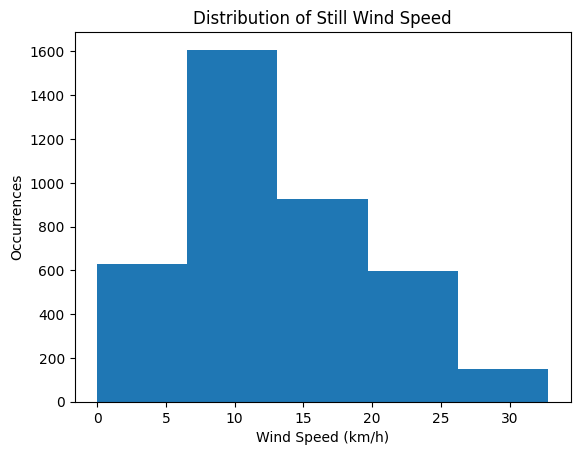

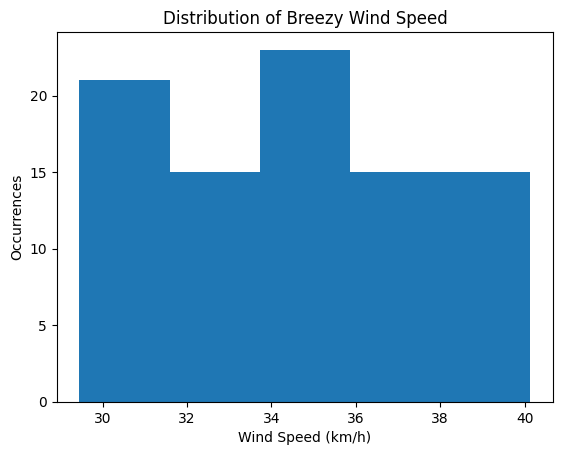

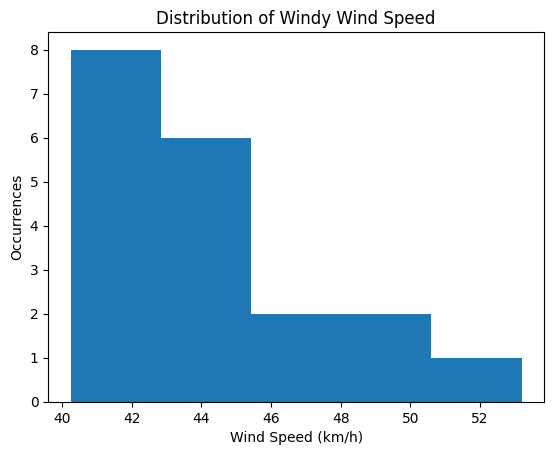

In [11]:
df_windy, df_breezy, df_still = df[df["Wind Type"]== "windy"],df[df["Wind Type"]== "breezy"],df[df["Wind Type"]== "still"]

#### Initiate Graphic #####
plt.hist(df_still["Wind Speed (km/h)"],5)
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.title("Distribution of Still Wind Speed")
#### Show Graphic ####
plt.show()

#### Initiate Graphic #####
plt.hist(df_breezy["Wind Speed (km/h)"],5)
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.title("Distribution of Breezy Wind Speed")
#### Show Graphic ####
plt.show()

#### Initiate Graphic #####
plt.hist(df_windy["Wind Speed (km/h)"],5)
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.title("Distribution of Windy Wind Speed")
#### Show Graphic ####
plt.show()

### Printing Multiple Plots at Once

The histograms above are interesting, but they would be easier to compare if they had the same x axis limits and were listed side by side. 

First, we use the bins argument in plt.hist() to force each our histograms to have the same limits. The range() function creates a list specifying were each bin begins and ends.  

Next we use plt.subplot() to print plots side by side. It called before you initiate your plots and its arguments are as follows: <br>
plt.subplot(number of rows, number of columns, number of plot you are currently on) <br>
Note that we don't call plt.show() until the end

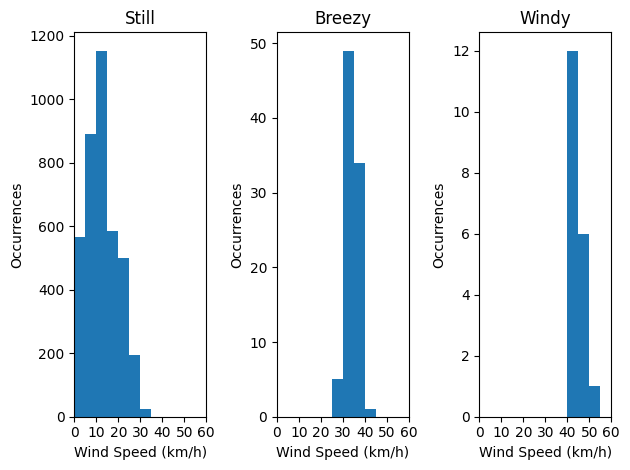

In [12]:
#### Subplot Info #####
plt.subplot(1,3,1)
#### Initiate Graphic #####
plt.hist(df_still["Wind Speed (km/h)"], bins = range(0,65,5) )
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.xlim(0,60)
plt.xticks(range(0,70,10))
plt.title("Still")


#### Subplot Info #####
plt.subplot(1,3,2)
#### Initiate Graphic #####
plt.hist(df_breezy["Wind Speed (km/h)"], bins = range(0,65,5) )
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.xlim(0,60)
plt.xticks(range(0,70,10))
plt.title("Breezy")


#### Subplot Info #####
plt.subplot(1,3,3)
#### Initiate Graphic #####
plt.hist(df_windy["Wind Speed (km/h)"], bins = range(0,65,5) )
#### Add Additional Elements ####
plt.ylabel("Occurrences")
plt.xlabel("Wind Speed (km/h)")
plt.xlim(0,60)
plt.xticks(range(0,70,10))
plt.title("Windy")

#### Show Graphic ####
plt.tight_layout()  #Helps Prevent Graphs from overlapping 
plt.show()

Plotting the histograms side by side and with the same axis now allows us to easily compare the ranges. We see that there is a bit of overlap between the 3 wind categories. 

## Using Graphs to Explore a DataSet - Boston Housing Dataset

Now that we know the basics of matplotlib, lets look at a few special graphs that allow us to explore an entire dataset at once.

The Boston housing dataset is downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv, and these are descriptions of the dataset columns:

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's\

In [13]:
# Read in housing dataset
housing_df = pd.read_csv("BostonHousing.csv")
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Print Histograms for all DataFrame columns
Below is special syntax to print histograms for all the columns in a DataFrame at once. This allows a quick visualization of the shape of the data which will be useful when we begin modeling.

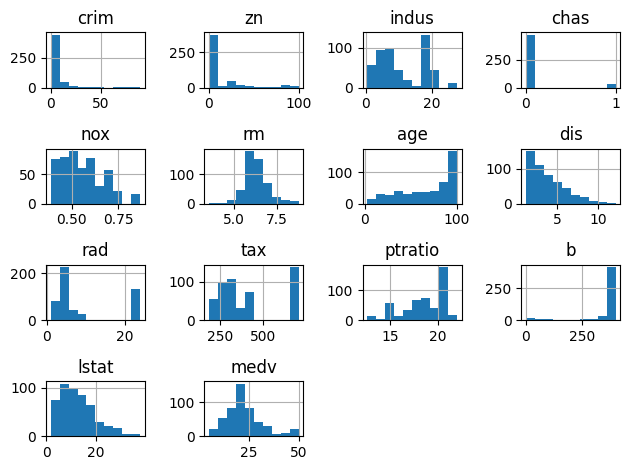

In [14]:
#print histograms for all columns 
housing_df.hist(bins = 10)
plt.tight_layout()
plt.show()

## Correlation Analysis 

We are interested in predicting "medv" the median price of homes in a neighborhood. \
We will use .corr to investigate which variables might be useful in this prediction. \
.corr returns a matrix of Pearson Correlation Coefficients. A value of 1 indicates a perfect positive linear correlation, while -1 if a perfect negative correlation. <br>
In the second line of code we apply a gradient to make the matrix easier to read at a glance.

In [17]:

cor_matrix = housing_df.corr() #run correlation matrix
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1) #produce correlation matrix table with colors

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The lstat and rm variables have the strongest correlation to medv. indus, nox, tax, and ptratio also have medium correlation. 

## Printing Multiple Scatter Plots

The correlation analysis was useful to tell us if a correlation exits, but we'll need scatter plots to better visualize the relationship. <br>
Below we use a loop and plt.subplots() to plot each columns as a function of medv. 

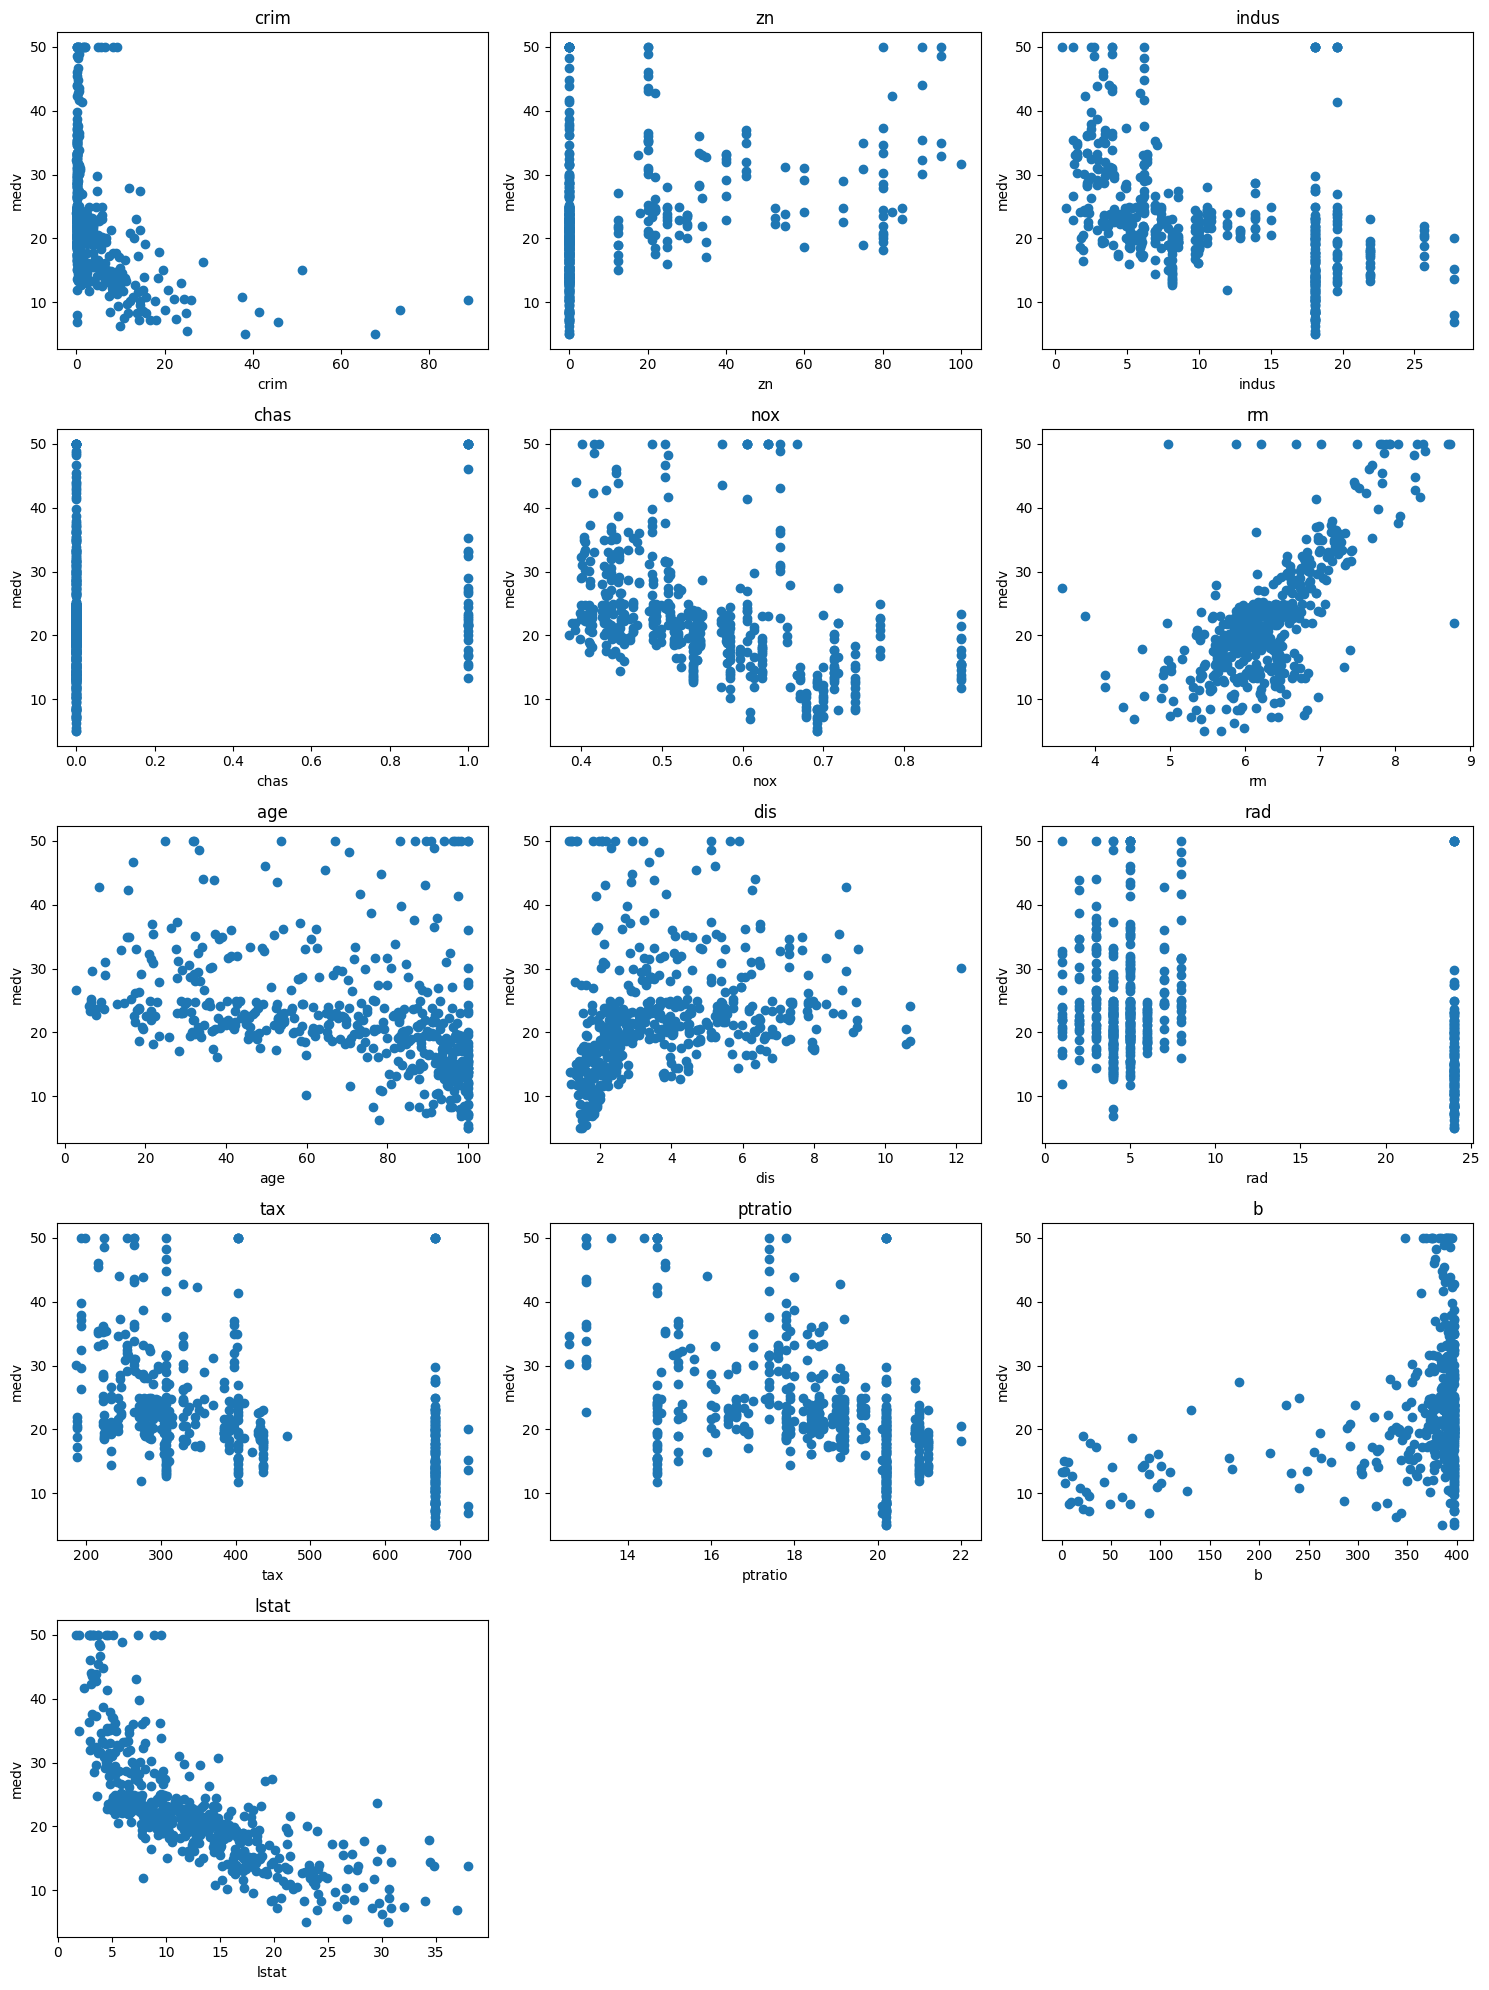

In [18]:
# Create scatter plots
x=1 # index for subplot number
plt.figure(figsize=(15, 20))  # Adjust width and height so they don't come out tiny

for col in housing_df.columns:
    if col != 'medv':  # Skip the column being plotted against
        plt.subplot(5,3,x)
        plt.scatter(housing_df[col],housing_df["medv"])
        plt.title(col)
        plt.ylabel("medv")
        plt.xlabel(col)
        x+=1

# Show Plots
plt.tight_layout()  
plt.show()

rm and lstat have clear linear correlations, but the rest are all over the place! How are we going to model this? 